In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
ls

16/                                     Relationship_20_Sentiment.ipynb
17/                                     Relationship_21_Sentiment.ipynb
18/                                     Relationship_22_Sentiment.ipynb
19/                                     Sentiment_test.ipynb
20/                                     relationship_16_comments_EDA_clean.csv
21/                                     relationship_17_comments_EDA_clean.csv
22/                                     relationship_18_comments_EDA_clean.csv
Relationship_16_Sentiment.ipynb         relationship_19_comments_EDA_clean.csv
Relationship_17_Sentiment.ipynb         relationship_20_comments_EDA_clean.csv
Relationship_18_Sentiment.ipynb         relationship_21_comments_EDA_clean.csv
Relationship_19_Sentiment.ipynb         relationship_22_comments_EDA_clean.csv


# Clean Text

In [3]:
df=pd.read_csv("relationship_16_comments_EDA_clean.csv",sep=";")

/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225213 entries, 0 to 225212
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   author             225213 non-null  object 
 1   author_flair_text  225213 non-null  int64  
 2   score              225213 non-null  int64  
 3   controversiality   225213 non-null  int64  
 4   stickied           225213 non-null  bool   
 5   link_id            225213 non-null  object 
 6   body               225213 non-null  object 
 7   distinguished      225213 non-null  object 
 8   gilded             225213 non-null  int64  
 9   edited             225213 non-null  bool   
 10  id                 225213 non-null  object 
 11  created_utc        225213 non-null  object 
 12  parent_id          225213 non-null  object 
 13  created_hour       225213 non-null  int64  
 14  created_day        225213 non-null  float64
 15  created_year       225213 non-null  float64
 16  cl

# Abkürzunggs words converting

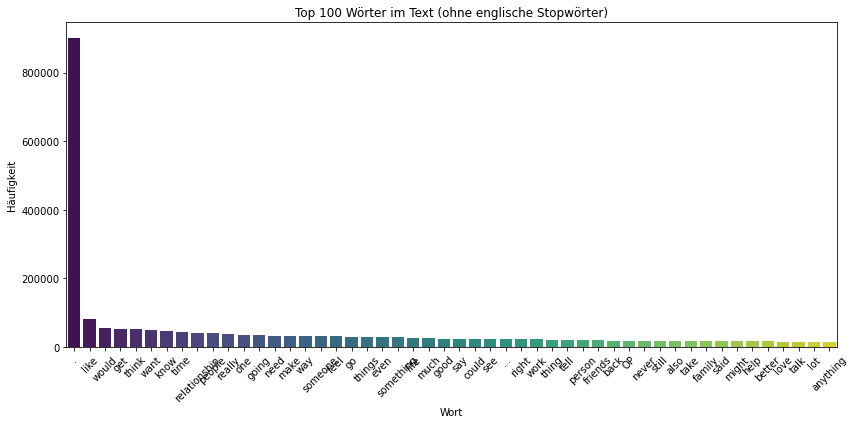

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords  # Importiere die Bibliothek für Stopwörter

# Annahme: Du hast bereits einen DataFrame 'df' mit einer Spalte 'body', die die Textdaten enthält.

# Lade die englischen Stopwörter aus NLTK
stopwords_english = set(stopwords.words('english'))

# Funktion zum Extrahieren und Zählen der Wörter unter Berücksichtigung der Stopwörter
def count_words(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords_english]
    return filtered_words

# Erstelle ein neues DataFrame 'df_filtered_words'
df_filtered_words = df.copy()
df_filtered_words['filtered_words'] = df['clean_text'].apply(count_words)

# Extrahiere die Top 100 häufigsten Wörter
word_counter = Counter(word for words in df_filtered_words['filtered_words'] for word in words)
top_words = word_counter.most_common()[0:50]  # Hier werden die ersten 20 Wörter übersprungen

# Erstelle das Countplot
top_words_df = pd.DataFrame(top_words, columns=['Wort', 'Häufigkeit'])
plt.figure(figsize=(12, 6))
sns.barplot(y='Häufigkeit', x='Wort', data=top_words_df, palette='viridis')
plt.title('Top 100 Wörter im Text (ohne englische Stopwörter)')
plt.ylabel('Häufigkeit')
plt.xlabel('Wort')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
df['clean_text'] = df['clean_text'].str.replace('OP', 'Originalposter')

In [7]:
df['comment_len'].mean()

75.93847158023738

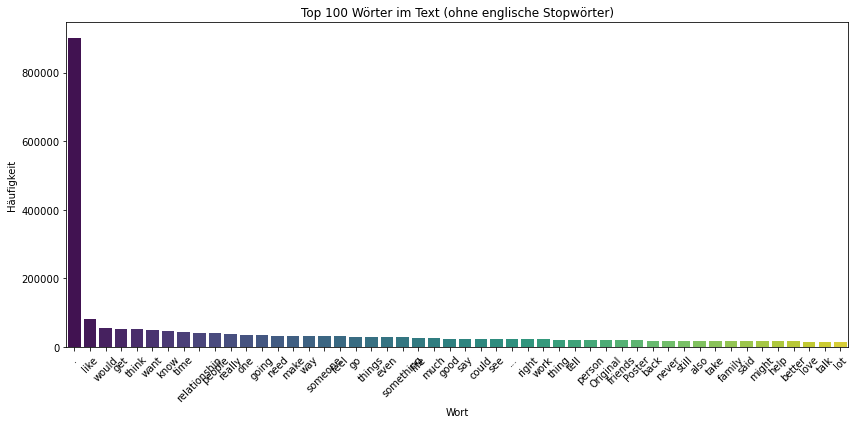

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords  # Importiere die Bibliothek für Stopwörter

# Annahme: Du hast bereits einen DataFrame 'df' mit einer Spalte 'body', die die Textdaten enthält.

# Lade die englischen Stopwörter aus NLTK
stopwords_english = set(stopwords.words('english'))

# Funktion zum Extrahieren und Zählen der Wörter unter Berücksichtigung der Stopwörter
def count_words(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords_english]
    return filtered_words

# Erstelle ein neues DataFrame 'df_filtered_words'
df_filtered_words = df.copy()
df_filtered_words['filtered_words'] = df['clean_text'].apply(count_words)

# Extrahiere die Top 100 häufigsten Wörter
word_counter = Counter(word for words in df_filtered_words['filtered_words'] for word in words)
top_words = word_counter.most_common()[0:50]  # Hier werden die ersten 20 Wörter übersprungen

# Erstelle das Countplot
top_words_df = pd.DataFrame(top_words, columns=['Wort', 'Häufigkeit'])
plt.figure(figsize=(12, 6))
sns.barplot(y='Häufigkeit', x='Wort', data=top_words_df, palette='viridis')
plt.title('Top 100 Wörter im Text (ohne englische Stopwörter)')
plt.ylabel('Häufigkeit')
plt.xlabel('Wort')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Sentiment Analyses

In [9]:
# Initialisieren des Sentiment-Analyzers
analyzer = SentimentIntensityAnalyzer()

# Funktion zur Berechnung des Sentiments und Erstellung der neuen Spalten
def get_sentiment_scores(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment
df['sentiment_scores'] = df["clean_text"].apply(get_sentiment_scores)

# Extrahieren und speichern Sie die Werte für positive, negative, neutrale Sentiments und den Compound-Wert
df['positive'] = df['sentiment_scores'].apply(lambda x: x['pos'])
df['negative'] = df['sentiment_scores'].apply(lambda x: x['neg'])
df['neutral'] = df['sentiment_scores'].apply(lambda x: x['neu'])
df['compound'] = df['sentiment_scores'].apply(lambda x: x['compound'])



In [ ]:
df.describe()

,author_flair_text,score,controversiality,gilded,created_hour,created_day,created_year,comment_len,positive,negative,neutral,compound
count,225213.0,225213.000000,225213.000000,225213.000000,225213.000000,225213.000000,225213.0,225213.000000,225213.000000,225213.000000,225213.000000,225213.000000
mean,0.0,18.610080,0.025807,0.000271,13.263568,15.089142,2016.0,75.938472,0.123623,0.083335,0.793040,0.186491
std,0.0,76.714045,0.158559,0.016455,7.152977,8.832397,0.0,82.900619,0.102559,0.082690,0.115618,0.611734
min,0.0,-549.000000,0.000000,0.000000,0.000000,1.000000,2016.0,1.000000,0.000000,0.000000,0.000000,-0.999300
25%,0.0,1.000000,0.000000,0.000000,7.000000,7.000000,2016.0,25.000000,0.057000,0.000000,0.732000,-0.318200
50%,0.0,3.000000,0.000000,0.000000,15.000000,15.000000,2016.0,51.000000,0.110000,0.069000,0.800000,0.296000
75%,0.0,11.000000,0.000000,0.000000,19.000000,22.000000,2016.0,96.000000,0.169000,0.124000,0.864000,0.757900
max,0.0,4480.000000,1.000000,1.000000,23.000000,30.000000,2016.0,1988.000000,1.000000,1.000000,1.000000,0.999900


In [ ]:
df["compound"].mean()

0.18649077095904262

In [ ]:
import pandas as pd

# Annahme: Du hast bereits einen DataFrame 'df' mit einer Spalte 'compound', die die Compound-Werte enthält.

# Funktion zur Zuordnung des Sentiments basierend auf dem Compound-Wert
def get_sentiment(compound):
    if compound >= 0.05:
        return '1'
    elif compound > -0.05 and compound < 0.05:
        return '0'
    elif compound <= -0.05:
        return '-1'

# Erstelle die neue Spalte 'Sentiment' basierend auf der 'compound'-Spalte
df['Sentiment'] = df['compound'].apply(get_sentiment)

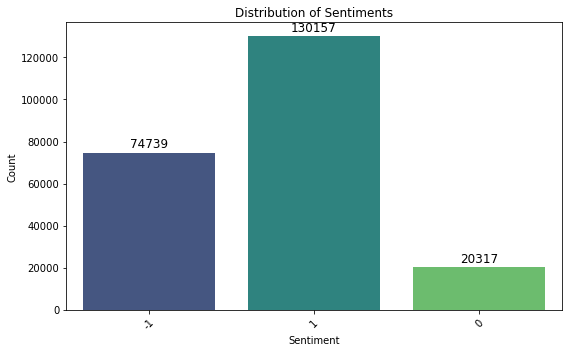

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the 'Sentiment' column has already been created as described in the previous code.

# Create the Countplot for Sentiments
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add the count above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()


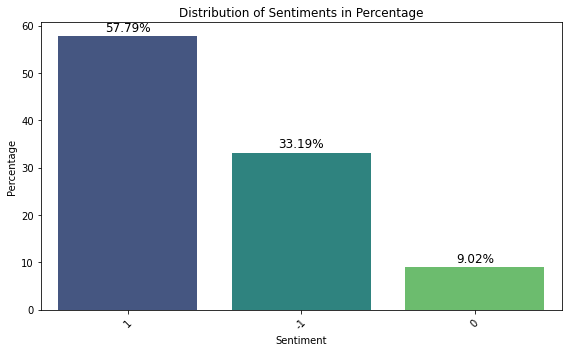

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the 'Sentiment' column has already been created as described in the previous code.

# Calculate the percentage for each sentiment
sentiment_counts = df['Sentiment'].value_counts(normalize=True) * 100

# Create the bar plot for Sentiments in percentage
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Distribution of Sentiments in Percentage')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

# Add the percentage above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()


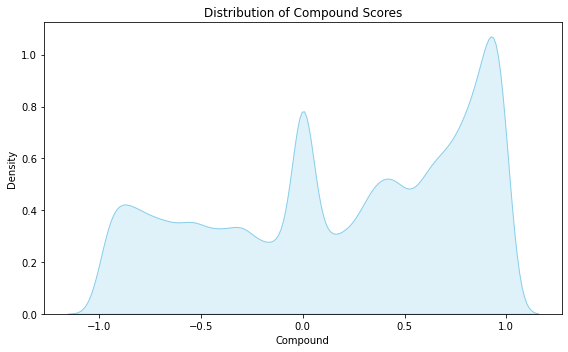

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the KDE plot for the 'compound' column
plt.figure(figsize=(8, 5))
sns.kdeplot(df['compound'], shade=True, color='skyblue')
plt.title('Distribution of Compound Scores')
plt.xlabel('Compound')
plt.ylabel('Density')
plt.tight_layout()
plt.show()



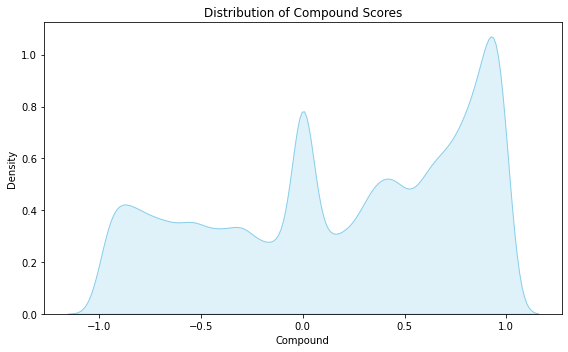

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the KDE plot for the 'compound' column
plt.figure(figsize=(8, 5))
sns.kdeplot(df['compound'], shade=True, color='skyblue')
plt.title('Distribution of Compound Scores')
plt.xlabel('Compound')
plt.ylabel('Density')
plt.tight_layout()
plt.show()


# Body

In [27]:
df_body=pd.read_csv("relationship_16_comments_EDA_clean.csv",sep=";")

/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [28]:
df_body.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225213 entries, 0 to 225212
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   author             225213 non-null  object 
 1   author_flair_text  225213 non-null  int64  
 2   score              225213 non-null  int64  
 3   controversiality   225213 non-null  int64  
 4   stickied           225213 non-null  bool   
 5   link_id            225213 non-null  object 
 6   body               225213 non-null  object 
 7   distinguished      225213 non-null  object 
 8   gilded             225213 non-null  int64  
 9   edited             225213 non-null  bool   
 10  id                 225213 non-null  object 
 11  created_utc        225213 non-null  object 
 12  parent_id          225213 non-null  object 
 13  created_hour       225213 non-null  int64  
 14  created_day        225213 non-null  float64
 15  created_year       225213 non-null  float64
 16  cl

# Abkürzung words converting

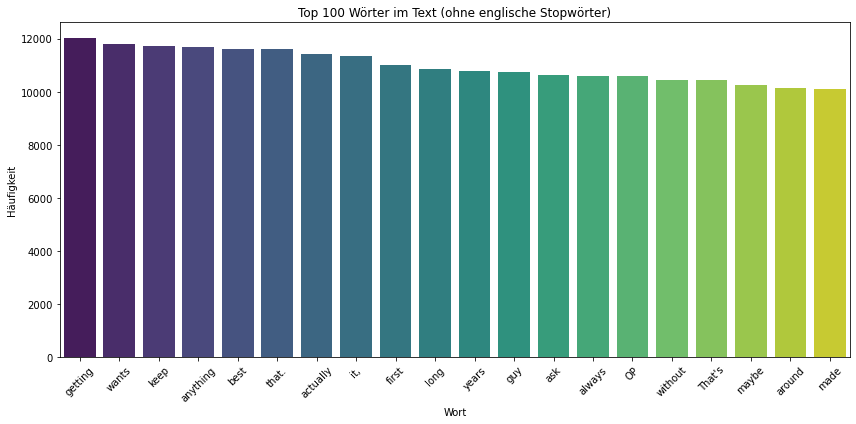

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords  # Importiere die Bibliothek für Stopwörter

# Annahme: Du hast bereits einen DataFrame 'df' mit einer Spalte 'body', die die Textdaten enthält.

# Lade die englischen Stopwörter aus NLTK
stopwords_english = set(stopwords.words('english'))

# Funktion zum Extrahieren und Zählen der Wörter unter Berücksichtigung der Stopwörter
def count_words(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords_english]
    return filtered_words

# Erstelle ein neues DataFrame 'df_filtered_words'
df_filtered_words = df.copy()
df_filtered_words['filtered_words'] = df_body['body'].apply(count_words)

# Extrahiere die Top 100 häufigsten Wörter
word_counter = Counter(word for words in df_filtered_words['filtered_words'] for word in words)
top_words = word_counter.most_common()[70:90]  # Hier werden die ersten 20 Wörter übersprungen

# Erstelle das Countplot
top_words_df = pd.DataFrame(top_words, columns=['Wort', 'Häufigkeit'])
plt.figure(figsize=(12, 6))
sns.barplot(y='Häufigkeit', x='Wort', data=top_words_df, palette='viridis')
plt.title('Top 100 Wörter im Text (ohne englische Stopwörter)')
plt.ylabel('Häufigkeit')
plt.xlabel('Wort')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [57]:
top_words

[('getting', 12011),
 ('wants', 11801),
 ('keep', 11736),
 ('anything', 11676),
 ('best', 11604),
 ('that.', 11602),
 ('actually', 11409),
 ('it,', 11339),
 ('first', 11022),
 ('long', 10870),
 ('years', 10773),
 ('guy', 10749),
 ('ask', 10615),
 ('always', 10611),
 ('OP', 10581),
 ('without', 10453),
 ("That's", 10427),
 ('maybe', 10250),
 ('around', 10142),
 ('made', 10089)]

In [58]:
df_body['body'] = df_body['body'].str.replace('OP', 'Original Poster')

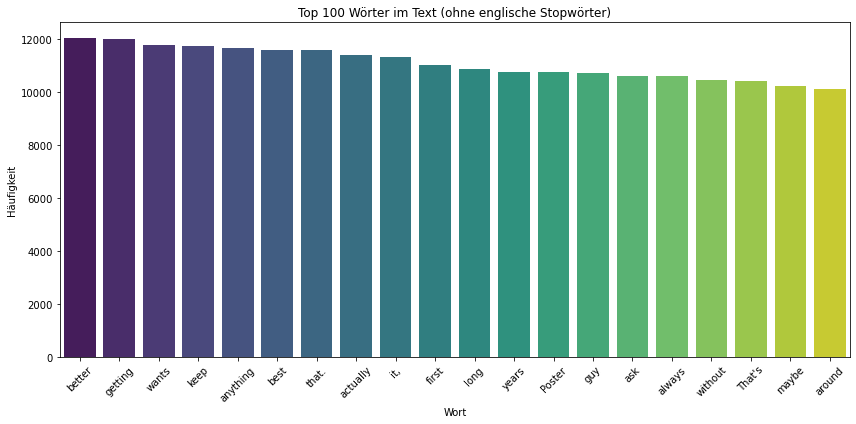

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords  # Importiere die Bibliothek für Stopwörter

# Annahme: Du hast bereits einen DataFrame 'df' mit einer Spalte 'body', die die Textdaten enthält.

# Lade die englischen Stopwörter aus NLTK
stopwords_english = set(stopwords.words('english'))

# Funktion zum Extrahieren und Zählen der Wörter unter Berücksichtigung der Stopwörter
def count_words(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords_english]
    return filtered_words

# Erstelle ein neues DataFrame 'df_filtered_words'
df_filtered_words = df.copy()
df_filtered_words['filtered_words'] = df_body['body'].apply(count_words)

# Extrahiere die Top 100 häufigsten Wörter
word_counter = Counter(word for words in df_filtered_words['filtered_words'] for word in words)
top_words = word_counter.most_common()[70:90]  # Hier werden die ersten 20 Wörter übersprungen

# Erstelle das Countplot
top_words_df = pd.DataFrame(top_words, columns=['Wort', 'Häufigkeit'])
plt.figure(figsize=(12, 6))
sns.barplot(y='Häufigkeit', x='Wort', data=top_words_df, palette='viridis')
plt.title('Top 100 Wörter im Text (ohne englische Stopwörter)')
plt.ylabel('Häufigkeit')
plt.xlabel('Wort')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Sentiment Analyses

In [60]:
# Initialisieren des Sentiment-Analyzers
analyzer = SentimentIntensityAnalyzer()

# Funktion zur Berechnung des Sentiments und Erstellung der neuen Spalten
def get_sentiment_scores(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment
df_body['sentiment_scores'] = df_body["body"].apply(get_sentiment_scores)

# Extrahieren und speichern Sie die Werte für positive, negative, neutrale Sentiments und den Compound-Wert
df_body['positive'] = df_body['sentiment_scores'].apply(lambda x: x['pos'])
df_body['negative'] = df_body['sentiment_scores'].apply(lambda x: x['neg'])
df_body['neutral'] = df_body['sentiment_scores'].apply(lambda x: x['neu'])
df_body['compound'] = df_body['sentiment_scores'].apply(lambda x: x['compound'])

In [62]:
df_body.describe()

,author_flair_text,score,controversiality,gilded,created_hour,created_day,created_year,comment_len,positive,negative,neutral,compound
count,225213.0,225213.000000,225213.000000,225213.000000,225213.000000,225213.000000,225213.0,225213.000000,225213.000000,225213.000000,225213.000000,225213.000000
mean,0.0,18.610080,0.025807,0.000271,13.263568,15.089142,2016.0,75.938472,0.129078,0.092246,0.778677,0.156481
std,0.0,76.714045,0.158559,0.016455,7.152977,8.832397,0.0,82.900619,0.112098,0.090295,0.126117,0.614509
min,0.0,-549.000000,0.000000,0.000000,0.000000,1.000000,2016.0,1.000000,0.000000,0.000000,0.000000,-0.999400
25%,0.0,1.000000,0.000000,0.000000,7.000000,7.000000,2016.0,25.000000,0.056000,0.015000,0.714000,-0.373600
50%,0.0,3.000000,0.000000,0.000000,15.000000,15.000000,2016.0,51.000000,0.113000,0.077000,0.787000,0.238200
75%,0.0,11.000000,0.000000,0.000000,19.000000,22.000000,2016.0,96.000000,0.177000,0.136000,0.855000,0.729600
max,0.0,4480.000000,1.000000,1.000000,23.000000,30.000000,2016.0,1988.000000,1.000000,1.000000,1.000000,0.999800


In [63]:
df_body["compound"].mean()

0.15648058593420927

In [64]:
import pandas as pd

# Annahme: Du hast bereits einen DataFrame 'df' mit einer Spalte 'compound', die die Compound-Werte enthält.

# Funktion zur Zuordnung des Sentiments basierend auf dem Compound-Wert
def get_sentiment(compound):
    if compound >= 0.05:
        return '1'
    elif compound > -0.05 and compound < 0.05:
        return '0'
    elif compound <= -0.05:
        return '-1'

# Erstelle die neue Spalte 'Sentiment' basierend auf der 'compound'-Spalte
df_body['Sentiment'] = df_body['compound'].apply(get_sentiment)

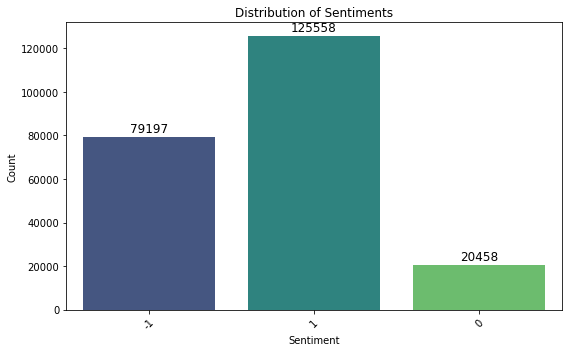

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the 'Sentiment' column has already been created as described in the previous code.

# Create the Countplot for Sentiments
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Sentiment', data=df_body, palette='viridis')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add the count above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

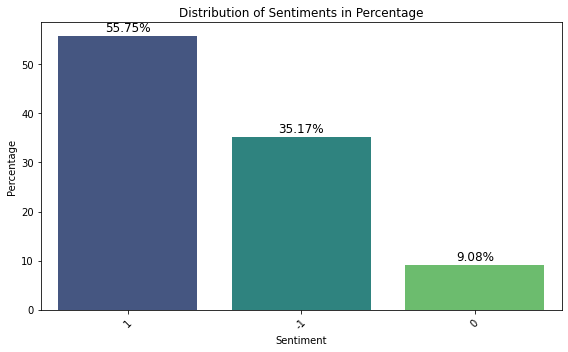

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the 'Sentiment' column has already been created as described in the previous code.

# Calculate the percentage for each sentiment
sentiment_counts = df_body['Sentiment'].value_counts(normalize=True) * 100

# Create the bar plot for Sentiments in percentage
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Distribution of Sentiments in Percentage')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

# Add the percentage above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

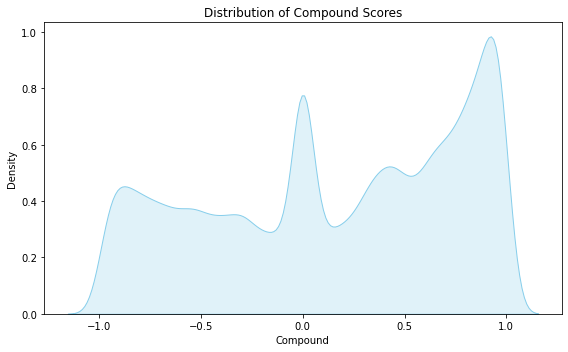

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the KDE plot for the 'compound' column
plt.figure(figsize=(8, 5))
sns.kdeplot(df_body['compound'], shade=True, color='skyblue')
plt.title('Distribution of Compound Scores')
plt.xlabel('Compound')
plt.ylabel('Density')
plt.tight_layout()
plt.show()